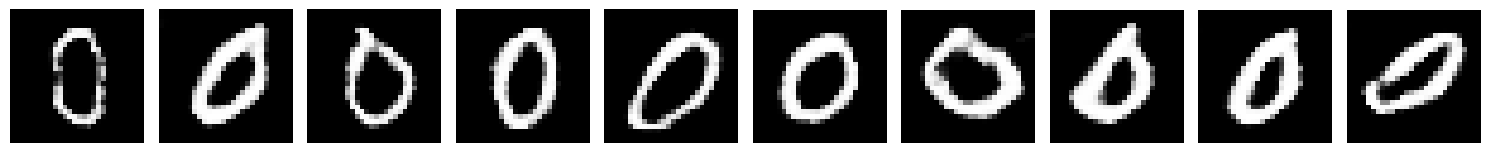

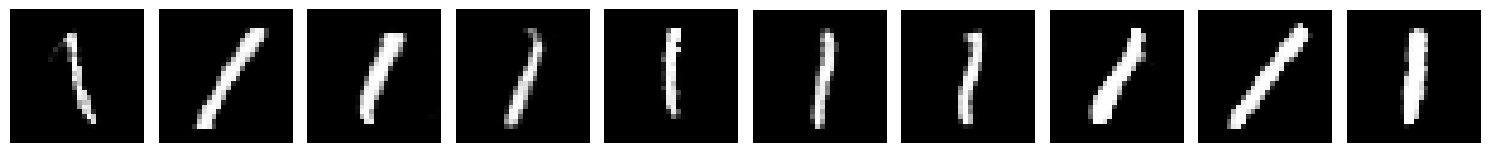

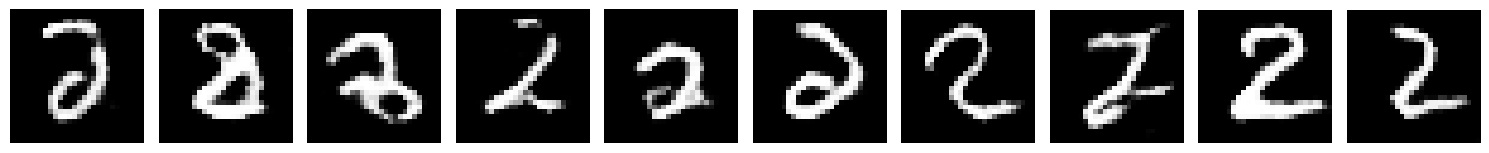

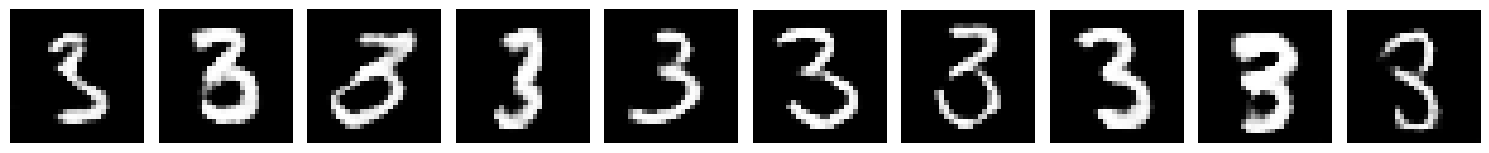

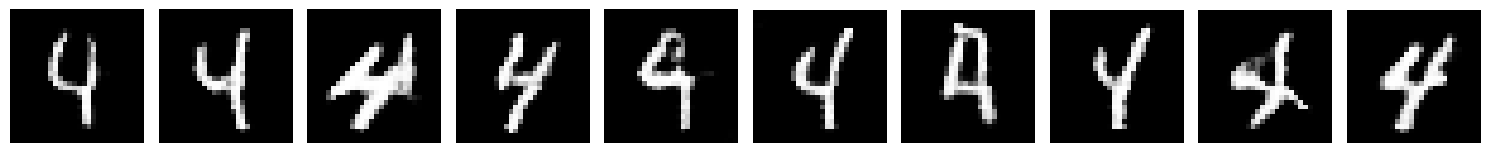

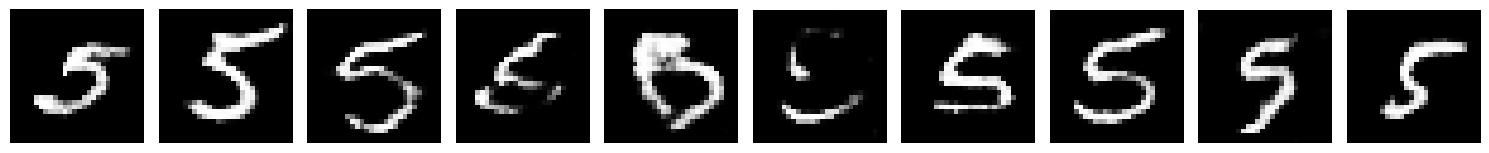

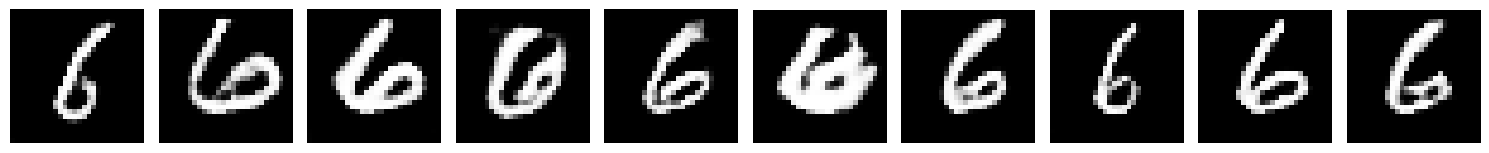

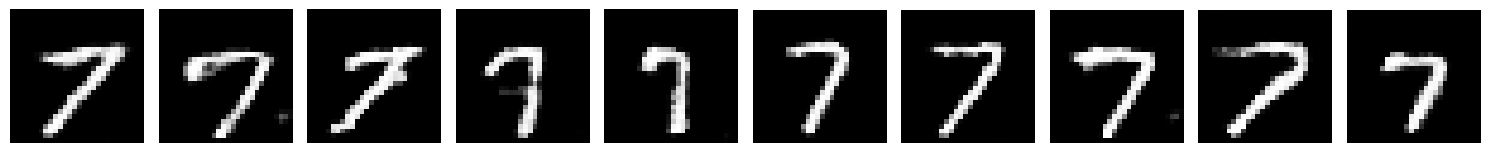

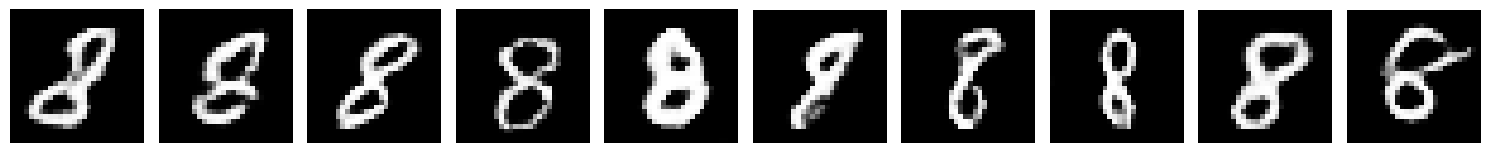

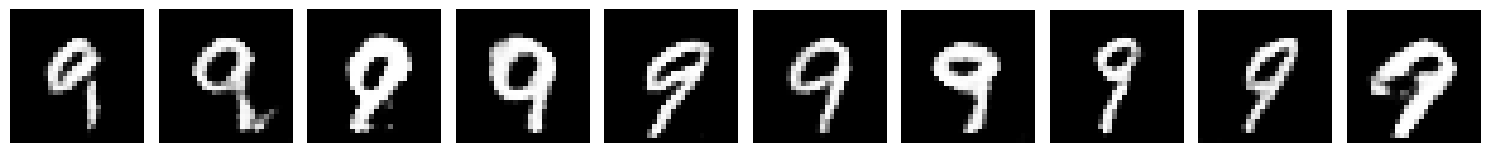

In [6]:
%matplotlib inline

import torch
import matplotlib.pyplot as plt

from train import GeneratorNet, DiscriminatorNet

device = "cuda" if torch.cuda.is_available() else "cpu"

@torch.no_grad()
def visualize(z_dim=100, n=10):
    models = torch.load('models.pt', map_location=device)
    g_net = GeneratorNet(z_dim=100)
    g_net.load_state_dict(models['g_net_state_dict'])
    d_net = DiscriminatorNet()
    d_net.load_state_dict(models['d_net_state_dict'])
    g_net.eval()
    d_net.eval()

    def sample_fake(m, y):
        z = torch.randn(m, z_dim, 1, 1, device=device)
        return g_net(z, y)

    for label in range(10):
        y = torch.full((n,), label, device=device)
        x = sample_fake(n, y)
        fig, ax = plt.subplots(1, n, figsize=(1.5 * n, 2))
        for i, xi in enumerate(x):
            img = xi.cpu().permute(1, 2, 0)
            ax[i].axis('off')
            ax[i].imshow(img, cmap='grey')
        plt.tight_layout()
        plt.show()

visualize()



    